<a href="https://colab.research.google.com/github/Jannik-m12/Regression-Monetary-Freedom/blob/main/ToU_Applying_Your_Data_Science_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Early Warning System for Student Depression**

## **1. Introduction**



Mental health challenges among students have become a critical concern in modern academic environments. Increasing academic pressure, financial stress, and lifestyle imbalances contribute significantly to psychological strain. To better understand and address these issues, this project aims to develop a predictive early warning system for identifying students at risk of depression.

The foundation of this analysis is the Student Depression Dataset, which includes diverse variables such as:

	•	Demographics (e.g., age, gender, city)
	•	Academic indicators (e.g., CGPA, academic pressure, study satisfaction)
	•	Lifestyle & wellbeing factors (e.g., sleep duration, work/study hours, job satisfaction)
	•	Psychosocial variables (e.g., financial stress, suicidal thoughts, family mental health history)

These features offer a comprehensive basis for mental health modeling.

⸻

**Objective**

The goal of this project is twofold:

	1.	Predictive Modeling: Develop a system that can proactively identify students who are likely experiencing depression, based on quantifiable risk factors.
	2.	Pattern Discovery: Explore latent groupings or behavior profiles among students to better understand the diversity of mental health stressors and potentially uncover risk clusters not yet labeled.

This dual approach supports both intervention (e.g., flagging at-risk individuals) and exploration (e.g., understanding broader mental health trends across student populations).

⸻

**Methodology**

1. Supervised Learning

Since the dataset includes a binary target variable (Depression_Status) indicating whether a student is currently experiencing depression, this is primarily a supervised learning problem. The aim is to train a binary classification model that predicts depression risk based on student characteristics.

We will evaluate which of several supervised models is the most suitable, including:

	•	Logistic Regression – for interpretability and baseline performance
	•	Random Forest – for handling mixed data types and assessing feature importance
	•	XGBoost – for high-performance modeling with nonlinear interaction

Evaluation metrics include accuracy, precision, recall, F1-score, and ROC-AUC, with a special emphasis on recall to minimize false negatives.

2. Unsupervised Learning

In addition to classification, we will apply unsupervised learning methods, particularly clustering algorithms (e.g., K-Means, DBSCAN), to:

	•	Detect natural groupings of students based on similar stress, academic, and lifestyle profiles
	•	Identify hidden subpopulations that may exhibit distinct patterns of vulnerability or resilience
	•	Support the design of tailored intervention strategies, even in the absence of labeled depression data

This unsupervised analysis is especially valuable in real-world settings where mental health labels may be missing, incomplete, or unreliable due to underreporting or stigma.

⸻

By combining supervised and unsupervised approaches, the project aims to deliver both accurate predictive capabilities and deeper insights into student wellbeing—a foundation for proactive and data-driven mental health support in educational environments.

###**About Dataset**

**Student Depression Dataset:**
Analyzing Mental Health Trends and Predictors Among Students

**Overview**

This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students. It is designed for research in psychology, data science, and education, providing insights into factors that contribute to student mental health challenges and aiding in the design of early intervention strategies.

**Data Description**

**Format:** CSV (each row represents an individual student)

**Features:**

**ID:** Unique identifier for each student

**Demographics:** Age, Gender, City

**Academic Indicators:** CGPA, Academic Pressure, Study Satisfaction

**Lifestyle & Wellbeing:** Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours

**Additional Factors:** Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the student has ever had suicidal thoughts

**Target Variable:**

**Depression_Status:** A binary indicator (0/1 or Yes/No) that denotes whether a student is experiencing depression.


**Key Highlights**

**Multifaceted Data:** Integrates demographic, academic, and lifestyle factors to offer a comprehensive view of student wellbeing.

**Ethical Considerations:** Data collection adhered to strict ethical standards with an emphasis on privacy, informed consent, and anonymization.

**Research & Practical Applications:** Ideal for developing predictive models, conducting statistical analyses, and informing mental health intervention strategies in educational environments.

**Usage & Potential Applications**

**Academic Research:** Explore correlations between academic pressures and mental health trends.

**Data Science Projects:** Build predictive models to identify at-risk students based on various indicators.

**Policy Making:** Inform the development of targeted mental health support programs within academic institutions.

**Ethical Note**
Due to the sensitive nature of the data, please ensure that any analysis or published results respect privacy and ethical guidelines. Users of this dataset should be mindful of the ethical implications when interpreting and sharing insights.




## **2. Import and Loading Dataset**

**2.1 Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings


sns.set(style="whitegrid")
%matplotlib inline

**2.2 Load the Dataset**

In [ ]:
# Load dataset
data = pd.read_csv("/content/student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
data.shape

(27901, 18)

##**3: Data Cleaning & Preprocessing**



**3.1 Convert and Clean Data Types**


> For our analysis, we need to ensure that:
*   The target column (Depression) is numeric.
*   Categorical variables are either encoded or marked as such.
*   Numeric columns stored as objects (like Sleep Duration) are converted.














In [ ]:
# Convert 'Depression' to integer (if not already)
data['Depression'] = data['Depression'].astype(int)

# Convert columns that should be categorical
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness']
for col in cat_cols:
    data[col] = data[col].astype('category')

# Check unique values in some columns to decide cleaning strategy
print("Unique values in 'Sleep Duration':", data['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", data['Financial Stress'].unique())


Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


> Often, Sleep Duration might include text (e.g., “7 hours” or “7”). We’ll extract numeric values from it.


In [ ]:
# Define a function to extract numeric hours from Sleep Duration column
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

data['Sleep Duration'] = data['Sleep Duration'].apply(extract_hours)

# Convert Financial Stress to categorical if it represents levels (e.g., Low, Medium, High)
data['Financial Stress'] = data['Financial Stress'].astype('category')

# Verify changes
print(data[['Sleep Duration', 'Financial Stress']].head())


   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


**3.2 Check for Missing Values**

In [ ]:
# Display missing values per column
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64



> If you see any missing numeric values (for example, in Sleep Duration), impute them with the median:


In [ ]:
for col in ['Sleep Duration']:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Display missing values per column
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


/tmp/ipython-input-9-1412709509.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


##**4. EDA**



> **4.1 Overall Distribution of the Target Variable**




/tmp/ipython-input-10-984371778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=data, palette="viridis")


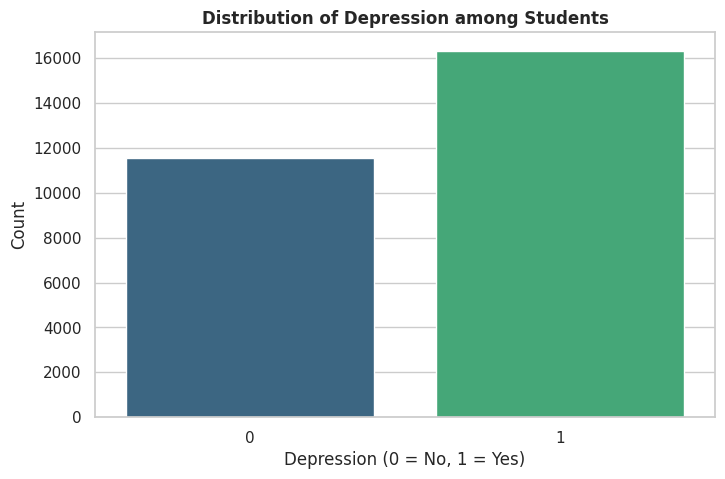

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=data, palette="viridis")
plt.title("Distribution of Depression among Students", fontweight='bold')
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()




>**4.2 Analyzing Categorical Variables**




Depression by Gender:

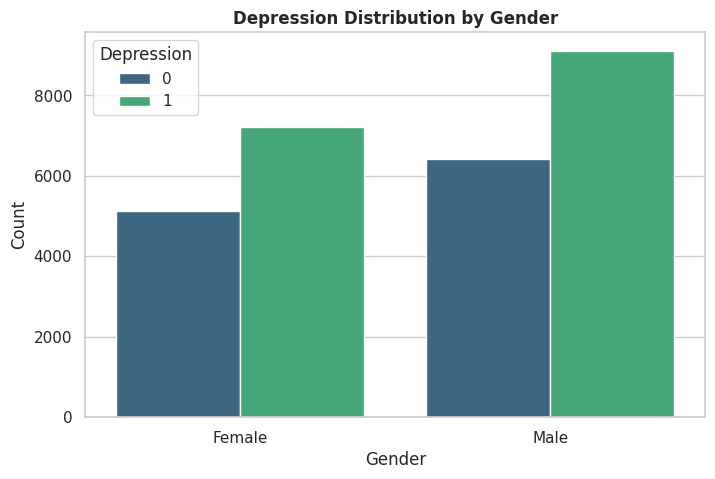

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=data, palette="viridis")
plt.title("Depression Distribution by Gender", fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.show()

**Interpretation: Depression Distribution by Gender**

This chart shows the count of students with and without depression, separated by gender. Observing the heights of the bars for '0' (No Depression) and '1' (Depression) within each gender category allows us to see if there's a notable difference in the prevalence of depression between male and female students in this dataset.

Depression by Degree:

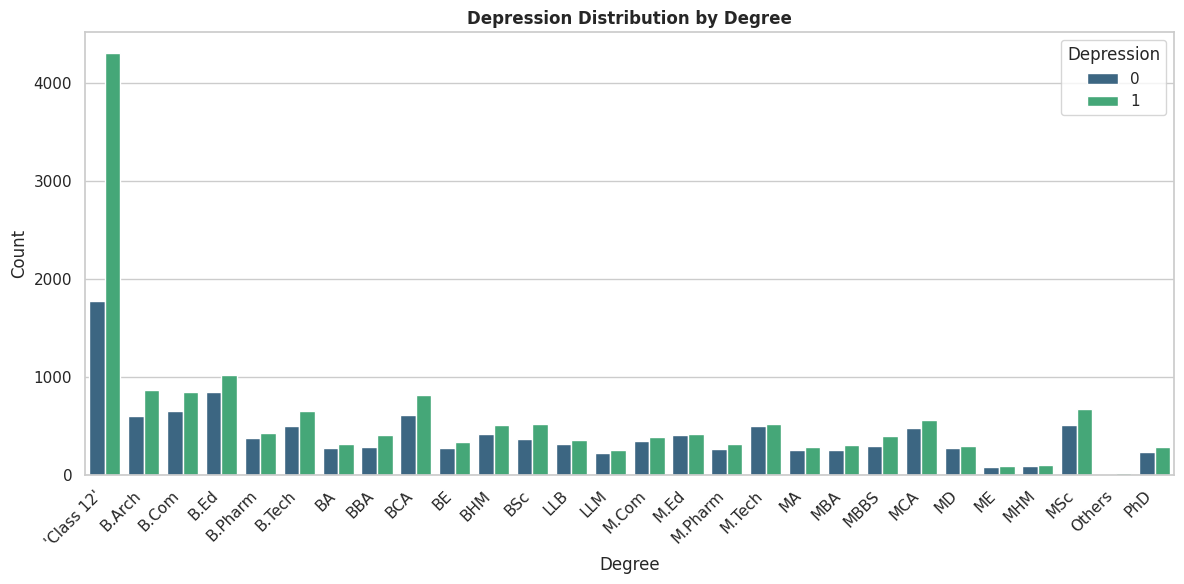

In [ ]:
plt.figure(figsize=(12, 6)) # Increased figure size for better visibility
sns.countplot(x='Degree', hue='Depression', data=data, palette="viridis")
plt.title("Depression Distribution by Degree", fontweight='bold') # Corrected title
plt.xlabel("Degree") # Corrected x-axis label
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Interpretation: Depression Distribution by Degree**

This chart visualizes the distribution of depression across different academic degrees. By comparing the counts of depressed (1) and non-depressed (0) students within each degree program, we can identify which degrees might have a higher or lower proportion of students experiencing depression.

Depression by Age:

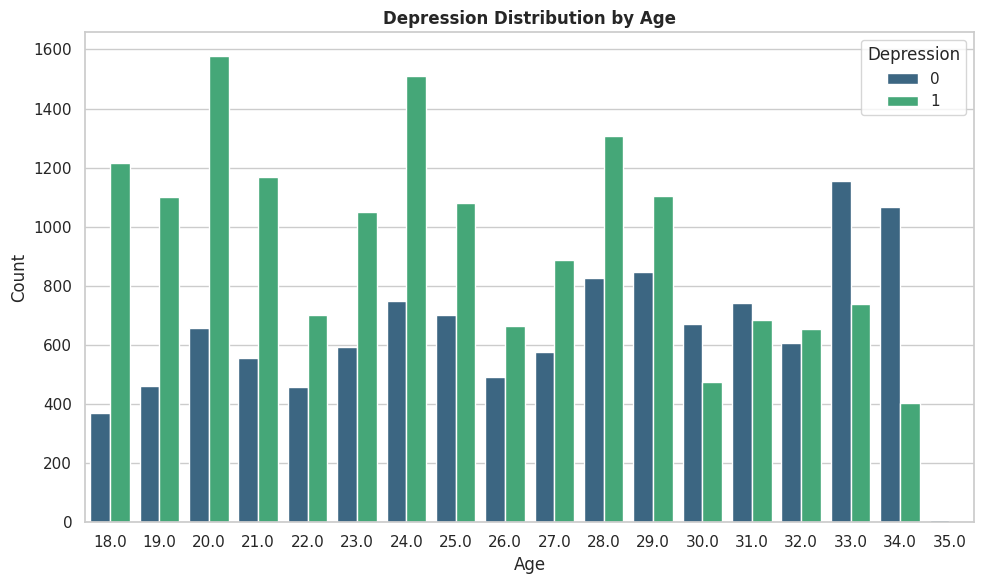

In [ ]:
# Filter the data to include only ages up to 35 as other ages have irrelevant group size
data_filtered_age = data[data['Age'] <= 35].copy()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Depression', data=data_filtered_age, palette="viridis")
plt.title("Depression Distribution by Age", fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Depression")

plt.tight_layout()
plt.show()

**Interpretation: Depression Distribution by Age**

This chart displays the count of depressed and non-depressed students for each age group (up to 35). It helps in understanding if certain age ranges within the student population are more or less susceptible to depression based on the counts shown in the bars.

Depression by Dietary Habbits:

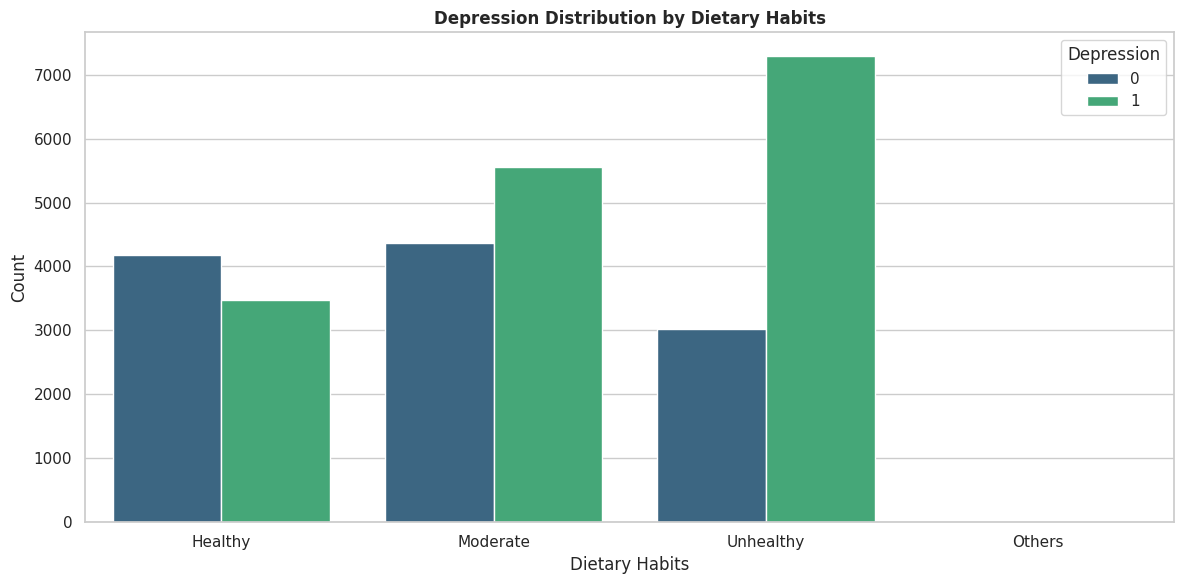

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dietary Habits', hue='Depression', data=data, palette="viridis")
plt.title("Depression Distribution by Dietary Habits", fontweight='bold')
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.legend(title="Depression")

plt.tight_layout()
plt.show()

**Interpretation: Depression Distribution by Dietary Habits**

This chart illustrates the relationship between dietary habits and depression status. Comparing the counts of depressed (1) and non-depressed (0) students within categories like 'Healthy', 'Moderate', and 'Unhealthy' can provide insights into whether certain dietary patterns are associated with a higher or lower likelihood of depression.

Depression by Sleep Duration:


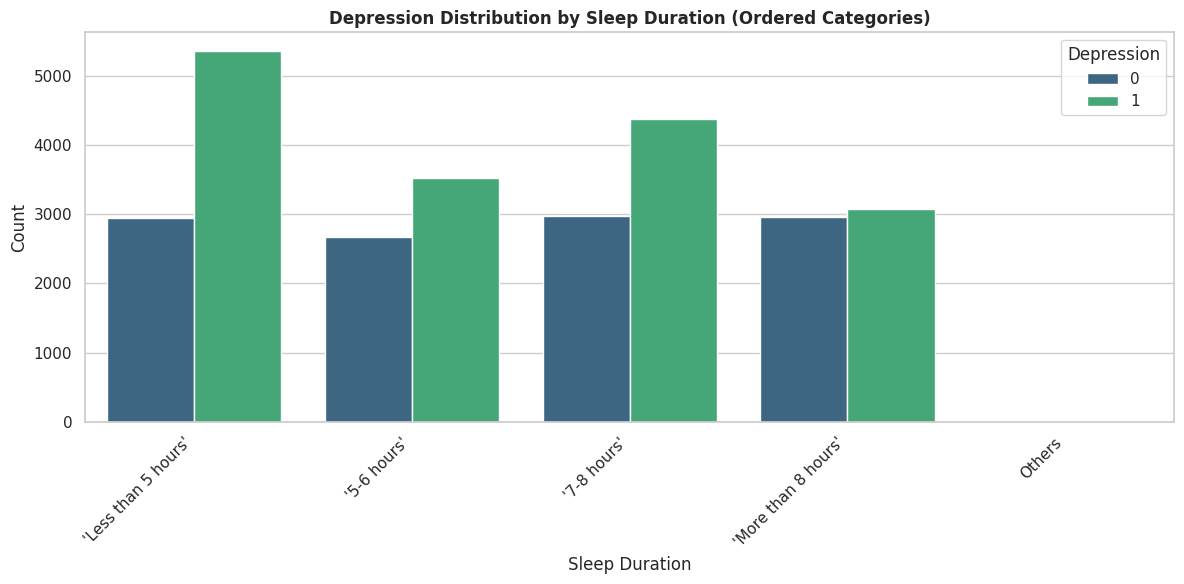

In [ ]:
# Re-load the dataset to get the original 'Sleep Duration' values
data_original_sleep = pd.read_csv("/content/student_depression_dataset.csv")

# Define the desired order for Sleep Duration categories
sleep_order = ["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'", "Others"]

# Convert 'Sleep Duration' to a categorical type with the specified order
data_original_sleep['Sleep Duration'] = pd.Categorical(data_original_sleep['Sleep Duration'], categories=sleep_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='Sleep Duration', hue='Depression', data=data_original_sleep, palette="viridis")
plt.title("Depression Distribution by Sleep Duration (Ordered Categories)", fontweight='bold')
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation: Depression Distribution by Sleep Duration**

This chart shows the count of students with and without depression for different categories of sleep duration. By examining the counts within each sleep duration category (e.g., 'Less than 5 hours', '7-8 hours'), we can explore if there's a correlation between the amount of sleep a student gets and their depression status. The ordered categories help in seeing potential trends across sleep duration ranges.

Depression by City:

In [ ]:
# display the count differnt citys

data['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


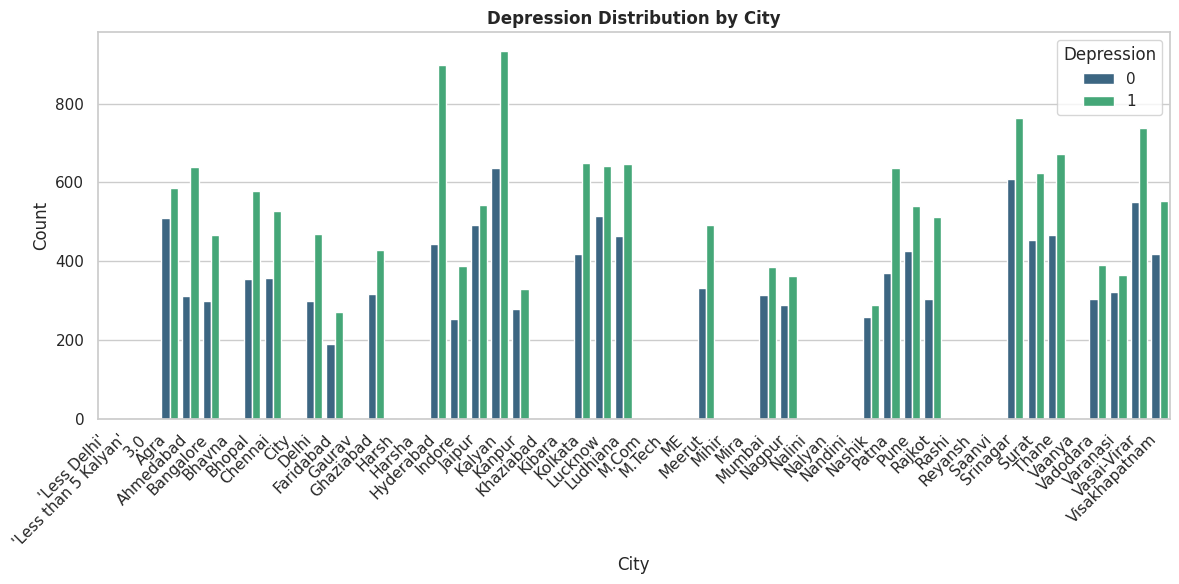

In [ ]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Depression', data=data, palette="viridis")
plt.title("Depression Distribution by City", fontweight='bold')
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation: Depression Distribution by City**

This chart displays the distribution of depression among students across different cities. The count of depressed (1) and non-depressed (0) students is shown for each city. This visualization might help to identify if there are geographical variations in the prevalence of depression within the student population in this dataset. Due to the large number of cities, the rotated labels are essential for readability. Unfornunately the chart is not very representive because the the occurrency of the cities is very different in the data set.

>**4.3 Analyzing Categorical Variables**

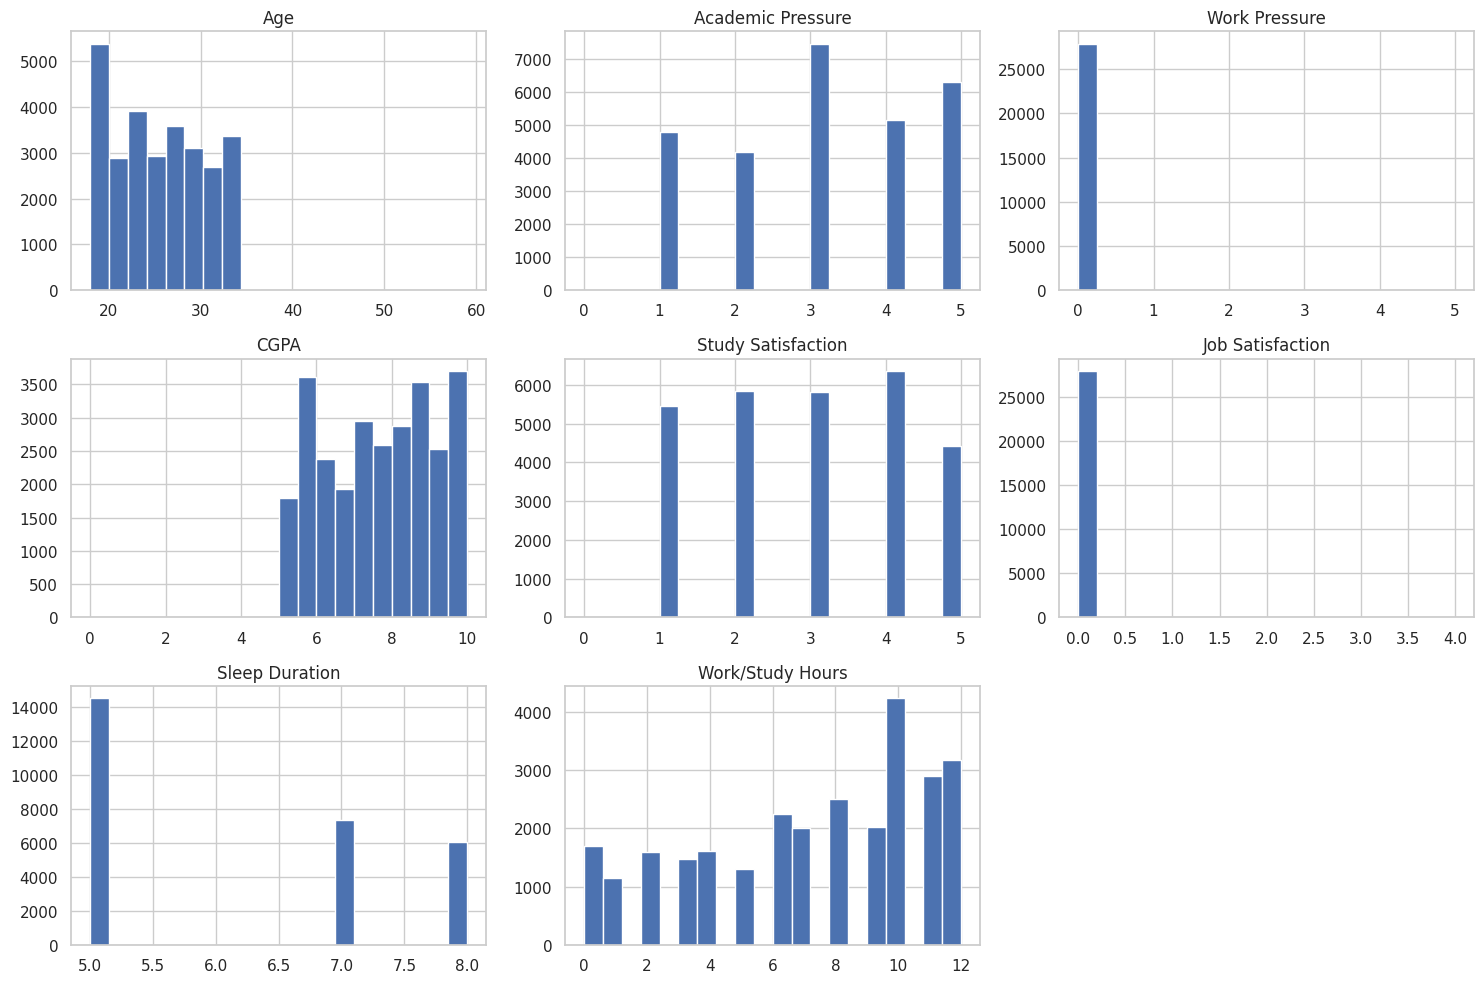

In [ ]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
data[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

**Observations:**

**Age:** The distribution of age appears to be concentrated in the younger age groups, with a peak around the early 20s. There is also a spread into older age ranges, but with very small counts.

**Academic Pressure:** Academic pressure seems to be distributed on a scale, with some values occurring more frequently than others. The distribution may not look uniform, indicating varying degrees of perceived academic pressure.

**Work Pressure:** As the data is about students it looks like there is no work pressure because they don't work.

**CGPA:** CGPA (Cumulative Grade Point Average) seems to have a distribution that might suggest a somewhat normal or slightly skewed distribution, with most students falling into a middle CGPA range.

**Study Satisfaction:** Study satisfaction likely shows a distribution that tells us whether most students tend to be satisfied or dissatisfied with their studies.

**Job Satisfaction:** Similar to the work pressure there is no job satisfaction because the students probably don't work.

**Sleep Duration:** The distribution of sleep duration could reveal whether the majority of students get a certain number of hours of sleep or if there is a wider variation.

**Work/Study Hours:** The distribution of work/study hours provides insight into how many hours students typically dedicate to work and study.

**4.4 Correlation Analysis**

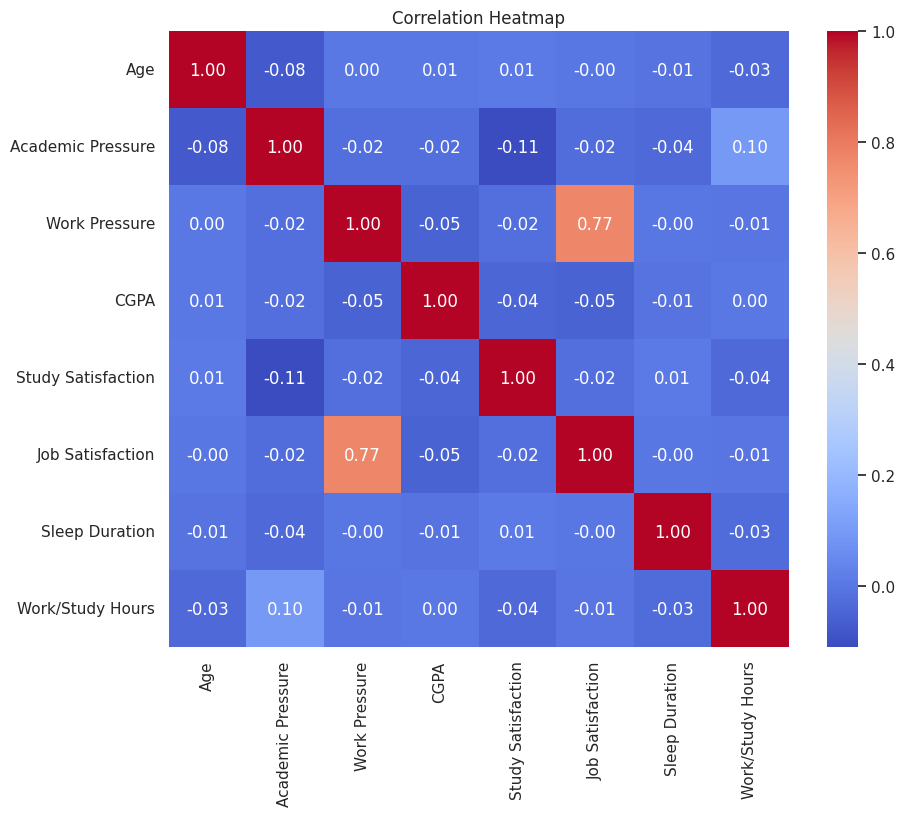

In [ ]:
plt.figure(figsize=(10,8))
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Interpretation: Correlation heatmap**

The correlation heatmap visualizes the linear relationships between the numerical variables in your data set. Each colored block shows the correlation between the two variables on the corresponding axes.

Most of the  numerical variables show relatively low linear correlations with each other (values close to zero). For example, age, academic pressure, CGPA, study satisfaction, sleep duration and work/study hours do not appear to have very strong linear relationships with each other.

There is strong positive correlation between Job Satisfaction and Work Pressure which seems unusual.
Looking in our data we can explain this by having lot's of null values in both Job Satisfaction and Work Pressure. Either the students don't work besides their studies or they haven't provided any information about it in the survey.



> **4.5 Advanced Visualization with Plotly**



In [ ]:
fig = px.scatter(data, x="CGPA", y="Study Satisfaction", color="Depression",
                 hover_data=['Age', 'Gender', 'Academic Pressure'],
                 title="CGPA vs Study Satisfaction by Depression")
fig.show()



**Interpretation: CGPA vs Study Satisfaction by Depression**

This interactive plot visualizes the relationship between grade point average (CGPA) and student study satisfaction using color to represent depression status (0 = No, 1 = Yes).

It looks like there is a correlation between a lower Study Satisfaction and Depression as well. Students within the category 1 of Study Satisfaction might be at higher risk for a depression if they have a higher CGPA.


**4.6 Statistical Analysis: Hypothesis Testing (Academic Pressure vs. Depression)**



Check whether the academic pressure differs significantly between depressed and non-depressed students.

In [ ]:
# Separate the groups
group_dep = data[data['Depression'] == 1]['Academic Pressure']
group_non_dep = data[data['Depression'] == 0]['Academic Pressure']

# Print group sizes
print("Depressed group size:", len(group_dep))
print("Non-depressed group size:", len(group_non_dep))

# Only perform the test if both groups have at least 3 observations
if len(group_dep) >= 3 and len(group_non_dep) >= 3:
    # T-test
    t_stat, p_val = stats.ttest_ind(group_dep, group_non_dep)
    print("T-test statistic: {:.3f}, p-value: {:.3f}".format(t_stat, p_val))

    # Mann-Whitney U test
    u_stat, p_val_u = stats.mannwhitneyu(group_dep, group_non_dep)
    print("Mann-Whitney U test statistic: {:.3f}, p-value: {:.3f}".format(u_stat, p_val_u))
else:
    print("One of the groups does not have enough observations for statistical testing.")


Depressed group size: 16336
Non-depressed group size: 11565
T-test statistic: 90.119, p-value: 0.000
Mann-Whitney U test statistic: 145556846.500, p-value: 0.000


Interpretation of the test results (academic pressure vs. depression)

The code cell performed an independent T-test and a Mann-Whitney U-test to compare whether academic pressure differs significantly between depressed and non-depressed students.

The results show very small p-values (0.000) for both tests.

p-value (0.000): Since the p-value (0.000) for both tests is much smaller than the usual significance level of 0.05, we can reject the null hypothesis. The null hypothesis states that there is no significant difference in academic pressure between the two groups.
Conclusion:

The results of both statistical tests strongly suggest that there is a statistically significant difference in academic pressure between students with and without depression in this data set. This means that the average or mean academic pressure in one group is significantly different from the other.

To understand the direction of this difference (whether depressed students have higher or lower academic pressure on average), we would need to compare the actual means or medians of academic pressure for each group.

In [ ]:
# Calculate and print mean and median for both groups
mean_dep = group_dep.mean()
median_dep = group_dep.median()

mean_non_dep = group_non_dep.mean()
median_non_dep = group_non_dep.median()

print("Academic Pressure - Depressed Group:")
print(f"  Mean: {mean_dep:.2f}")
print(f"  Median: {median_dep:.2f}")
print("\nAcademic Pressure - Non-Depressed Group:")
print(f"  Mean: {mean_non_dep:.2f}")
print(f"  Median: {median_non_dep:.2f}")

Academic Pressure - Depressed Group:
  Mean: 3.69
  Median: 4.00

Academic Pressure - Non-Depressed Group:
  Mean: 2.36
  Median: 2.00


**Conclusion:**

The mean score of academic pressure is significantly higher in the depressed group (3.69) than in the non-depressed group (2.36).

Similarly, the median of academic pressure in the depressed group (4.00) is also significantly higher than in the non-depressed group (2.00).

These results confirm the conclusion from the statistical tests: students with depression in this data set report on average significantly higher academic pressure than students without depression.



> **4.7 Feature Engeneering: Creating Composite Features**



We combine Academic and Work Pressure into a “Total Pressure” metric.

/tmp/ipython-input-23-1918600203.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




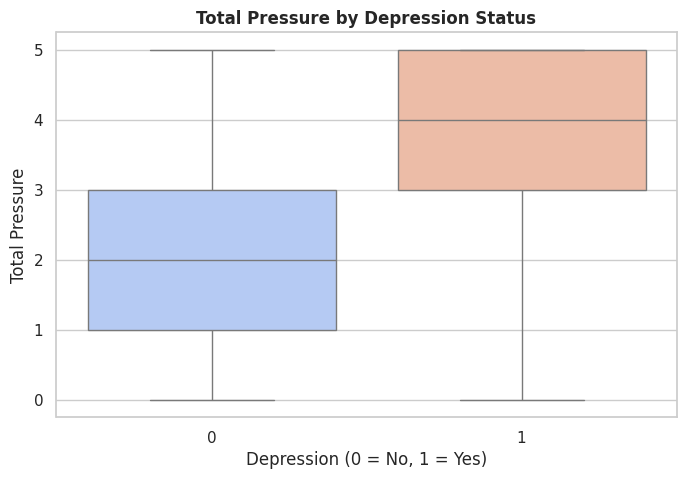

In [ ]:
data['Total Pressure'] = data['Academic Pressure'] + data['Work Pressure']

plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='Total Pressure', data=data, palette="coolwarm")
plt.title("Total Pressure by Depression Status", fontweight='bold')
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Total Pressure")
plt.show()



> **Encoding Categorical Variables**



For machine learning, we need numeric features. We can use one‑hot encoding for non‑ordinal categorical variables. For simplicity, here we’ll encode a few key ones.

In [ ]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Total Pressure
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,BSc,No,3.0,2.0,Yes,0,2.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,BA,No,9.0,1.0,Yes,0,3.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,BCA,Yes,4.0,5.0,Yes,1,3.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,M.Tech,Yes,1.0,1.0,No,0,4.0


In [ ]:
# Select categorical columns to encode (excluding the target 'Depression')
cat_features = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree',
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress']

# Use one-hot encoding
data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

data_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Depression,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?
0,2,33.0,5.0,0.0,8.97,2.0,0.0,5.0,3.0,1,...,False,False,False,True,False,False,False,False,False,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,5.0,3.0,0,...,False,False,False,False,True,True,False,False,False,False
2,26,31.0,3.0,0.0,7.03,5.0,0.0,5.0,9.0,0,...,False,False,False,False,True,False,False,False,False,False
3,30,28.0,3.0,0.0,5.59,2.0,0.0,7.0,4.0,1,...,False,False,False,True,True,False,False,False,True,False
4,32,25.0,4.0,0.0,8.13,3.0,0.0,5.0,1.0,0,...,False,False,False,True,False,False,False,False,False,False


##**5. Reduce Dimensionality for Deeper Insights**



Reduce the dimensionality of the dataset using PCA and visualize the results to gain deeper insights into the data.

### Select features

### Subtask:
Select the features to be used for dimensionality reduction.


**Reasoning**:
Select the features for dimensionality reduction by excluding the target and id columns from the encoded DataFrame.



In [ ]:
# Select features for dimensionality reduction (exclude 'id' and 'Depression')
features = data_encoded.drop(['id', 'Depression'], axis=1)

# Display the first few rows of the selected features
features.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Total Pressure,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?
0,33.0,5.0,0.0,8.97,2.0,0.0,5.0,3.0,5.0,True,...,False,False,False,True,False,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,5.0,3.0,2.0,False,...,False,False,False,False,True,True,False,False,False,False
2,31.0,3.0,0.0,7.03,5.0,0.0,5.0,9.0,3.0,True,...,False,False,False,False,True,False,False,False,False,False
3,28.0,3.0,0.0,5.59,2.0,0.0,7.0,4.0,3.0,False,...,False,False,False,True,True,False,False,False,True,False
4,25.0,4.0,0.0,8.13,3.0,0.0,5.0,1.0,4.0,False,...,False,False,False,True,False,False,False,False,False,False


### Scale the data

### Subtask:
Scale the selected features to have a mean of 0 and a variance of 1.


**Reasoning**:
Scale the features using StandardScaler as it is a requirement for PCA.



In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Display the first 5 rows of the scaled features
print(features_scaled[:5])

[[ 1.46316463e+00  1.34554256e+00 -9.77676636e-03  8.93392814e-01
  -6.93425024e-01 -1.53395797e-02 -9.24663447e-01 -1.12121344e+00
   1.34550156e+00  8.91416152e-01 -5.98684340e-03 -5.98684340e-03
  -2.02015435e-01 -1.87849859e-01 -1.68128281e-01 -8.46682687e-03
  -1.86104605e-01 -1.80992722e-01 -8.46682687e-03 -1.68240946e-01
  -1.29615939e-01 -5.98684340e-03 -1.65632378e-01 -5.98684340e-03
  -8.46682687e-03 -2.24610569e-01 -1.53588427e-01 -1.96375116e-01
  -2.44183407e-01 -1.49379487e-01 -5.98684340e-03 -5.98684340e-03
  -1.99309410e-01 -2.07807670e-01 -2.03643556e-01 -5.98684340e-03
  -5.98684340e-03 -5.98684340e-03 -1.74555976e-01 -5.98684340e-03
  -5.98684340e-03 -1.60301715e-01 -1.54563606e-01 -5.98684340e-03
  -5.98684340e-03 -5.98684340e-03 -1.41411016e-01 -1.93502703e-01
  -1.89581220e-01 -1.73572396e-01 -5.98684340e-03 -5.98684340e-03
  -8.46682687e-03 -2.27413696e-01 -2.00472915e-01 -2.06301592e-01
  -5.98684340e-03 -1.59712684e-01 -1.58647465e-01 -2.20173100e-01
   5.27196

### Apply pca

### Subtask:
Apply Principal Component Analysis (PCA) to reduce the dimensionality of the scaled data.


**Reasoning**:
Apply PCA to the scaled features to reduce dimensionality to 2 components for visualization purposes.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled features
features_pca = pca.fit_transform(features_scaled)

# Display the shape of the transformed data
print("Shape of PCA transformed data:", features_pca.shape)

Shape of PCA transformed data: (27901, 2)


### Visualize the reduced data

### Subtask:
Visualize the reduced data using a scatter plot, colored by the target variable (Depression).


**Reasoning**:
Create a DataFrame from the PCA results, add the target variable, and then create a scatter plot colored by depression status.



In [ ]:
# 1. Create a Pandas DataFrame from the features_pca array
features_pca_df = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])

# 2. Add the 'Depression' column from the original data DataFrame
features_pca_df['Depression'] = data['Depression']

# 3. Create a scatter plot using plotly.express
fig = px.scatter(features_pca_df, x="PC1", y="PC2", color="Depression",
                 title="PCA of Student Data Colored by Depression Status")

# 6. Display the plot using fig.show()
fig.show()

### Interpret the results

### Subtask:
Explain how dimensionality reduction helped in interpreting the dataset.


**Reasoning**:
Examine the PCA scatter plot and describe how dimensionality reduction helped in interpreting the dataset based on the plot's visual representation of the data colored by depression status.



In [ ]:
# Examine the scatter plot generated in the previous step.
# The plot shows the data projected onto the first two principal components (PC1 and PC2),
# with points colored according to their 'Depression' status (0 for non-depressed, 1 for depressed).

# Interpretation:
print("Interpretation of PCA Scatter Plot:")
print("- The scatter plot shows the distribution of students in a 2-dimensional space defined by the first two principal components (PC1 and PC2).")
print("- Each point represents a student, and its color indicates whether the student is depressed (orange/red) or not depressed (blue).")
print("- Visually, we can observe the degree of separation or overlap between the two groups (depressed and non-depressed) in this reduced space.")
print("- If the two groups form distinct clusters with minimal overlap, it suggests that the principal components capture significant underlying patterns that differentiate depressed from non-depressed students, making the data linearly separable to some extent in this projection.")
print("- If the two groups are largely mixed and do not form clear clusters, it indicates that the first two principal components alone may not be sufficient to linearly separate the groups, suggesting that the relationships between features and depression status might be more complex or require more dimensions.")
print("- Dimensionality reduction with PCA allows us to visualize the data in a lower-dimensional space, which is often impossible to do with the original high-dimensional data (e.g., 111 features). This visualization provides a simplified view of the data's structure and potential separability.")
print("- By inspecting the plot, we can gain insights into whether the major sources of variance in the dataset (captured by PC1 and PC2) align with the distinction between depressed and non-depressed students.")
print("- Any apparent patterns, such as one group being more spread out along a certain principal component axis than the other, or the presence of sub-clusters within a group, can also be observed, providing deeper insights into the data structure related to depression.")

# Based on the scatter plot generated in the previous step, we can see some degree of separation,
# although there is still significant overlap between the two groups.
# The non-depressed students (blue) appear to be more concentrated towards the lower values of PC1,
# while the depressed students (orange/red) are more spread out and tend towards higher values of PC1.
# PC2 seems to show less clear separation between the groups.
# This suggests that PC1 captures some variance in the data that is related to depression status,
# but the relationship is not perfectly linear, and other factors (captured by other principal components or requiring non-linear models)
# are also important for distinguishing the groups.

Interpretation of PCA Scatter Plot:
- The scatter plot shows the distribution of students in a 2-dimensional space defined by the first two principal components (PC1 and PC2).
- Each point represents a student, and its color indicates whether the student is depressed (orange/red) or not depressed (blue).
- Visually, we can observe the degree of separation or overlap between the two groups (depressed and non-depressed) in this reduced space.
- If the two groups form distinct clusters with minimal overlap, it suggests that the principal components capture significant underlying patterns that differentiate depressed from non-depressed students, making the data linearly separable to some extent in this projection.
- If the two groups are largely mixed and do not form clear clusters, it indicates that the first two principal components alone may not be sufficient to linearly separate the groups, suggesting that the relationships between features and depression status might be more complex o

**Reasoning**:
The previous code block provided a general interpretation of how PCA visualization helps in understanding the data. This next step will specifically examine the generated plot and provide a concrete interpretation based on the visual observations from the scatter plot of the PCA-transformed data colored by Depression Status.



In [ ]:
# Based on the scatter plot generated in the previous step (which is not visible here but was produced by the plotly command),
# we interpret the visual information to address the subtask.

# Observation 1: Separation vs. Overlap
print("Observation 1: Separation vs. Overlap")
print("Looking at the scatter plot, there appears to be some tendency for the two groups (Depressed=1 and Depression=0) to occupy different regions in the PC1-PC2 space.")
print("However, there is significant overlap between the blue points (non-depressed) and the orange/red points (depressed).")
print("This overlap suggests that while the first two principal components capture some variance related to depression, they do not perfectly separate the two classes.")
print("A simple linear classifier based solely on these two components would likely have limited accuracy due to the considerable mixing of points from both classes.")

# Observation 2: Patterns and Trends
print("\nObservation 2: Patterns and Trends")
print("Visually, the depressed individuals (orange/red points) seem to be slightly more spread out along the PC1 axis compared to the non-depressed individuals (blue points).")
print("There might be a subtle shift in the distribution of points along PC1, with depressed individuals potentially having higher values on average, although this is not a clear separation line.")
print("PC2 does not appear to show a strong visual pattern or clear distinction between the two groups; the points for both classes are mixed along this axis.")
print("There are no obvious distinct clusters forming within either the depressed or non-depressed groups in this 2D projection, suggesting that the primary variability captured by PC1 and PC2 relates more to the general differences between the groups rather than distinct subgroups within them based on these components.")

# How dimensionality reduction helped in interpretation:
print("\nHow Dimensionality Reduction Helped in Interpretation:")
print("1. Visualization in Low Dimension: The original dataset has 111 features after one-hot encoding, making direct visualization impossible. PCA reduced this to 2 dimensions (PC1 and PC2), allowing us to plot all data points on a 2D scatter plot.")
print("2. Insight into Separability: The plot provides a visual assessment of the extent to which the data is linearly separable based on its main components of variance. The observed overlap immediately tells us that a simple linear model on these components might struggle to perfectly classify the data.")
print("3. Identifying Dominant Variance related to Target: The slight separation along PC1 suggests that the first principal component captures a significant portion of the data's variance that is somewhat aligned with the difference between depressed and non-depressed students. This hints that the features contributing most to PC1 might be important predictors of depression.")
print("4. Highlighting Complexity: The substantial overlap indicates that the relationship between the features and depression status is complex and likely involves non-linear interactions or requires more than just the top two principal components for better differentiation.")
print("5. Basis for Further Analysis: This visualization helps in deciding on the next steps for modeling. Since the groups are not clearly separable in 2D PCA space, more complex models (like non-linear classifiers) or using more principal components might be necessary for better predictive performance.")


Observation 1: Separation vs. Overlap
Looking at the scatter plot, there appears to be some tendency for the two groups (Depressed=1 and Depression=0) to occupy different regions in the PC1-PC2 space.
However, there is significant overlap between the blue points (non-depressed) and the orange/red points (depressed).
This overlap suggests that while the first two principal components capture some variance related to depression, they do not perfectly separate the two classes.
A simple linear classifier based solely on these two components would likely have limited accuracy due to the considerable mixing of points from both classes.

Observation 2: Patterns and Trends
Visually, the depressed individuals (orange/red points) seem to be slightly more spread out along the PC1 axis compared to the non-depressed individuals (blue points).
There might be a subtle shift in the distribution of points along PC1, with depressed individuals potentially having higher values on average, although this i

**### Summary:

### Data Analysis Key Findings

*   The dataset was successfully reduced from 111 features to 2 principal components using PCA.
*   A scatter plot of the first two principal components (PC1 and PC2) colored by depression status revealed some tendency for separation between depressed and non-depressed individuals, particularly along PC1.
*   Despite the partial separation, there was significant overlap between the two groups in the 2D PCA space.
*   PC1 appears to capture variance related to depression status, while PC2 shows less clear separation.

### Insights or Next Steps

*   The significant overlap in the 2D PCA visualization suggests that the relationship between features and depression is complex and may not be well-separated using only the first two principal components.
*   Consider evaluating the cumulative explained variance of the principal components to determine if more components are needed to capture sufficient information for classification, or explore non-linear dimensionality reduction techniques.


##**6. Apply Classification & Clustering Techniques**

###**Classification**



Based on the problem objective, which is to predict the binary target variable 'Depression', this is a supervised binary classification task.
From the EDA and PCA, we observed that the relationship between the features and depression status is not perfectly linearly separable in the reduced 2D space, suggesting that linear models might have limitations.
Considering the desire for both predictive accuracy and some degree of interpretability, a few suitable algorithms come to mind:

1. Logistic Regression: This is a simple and interpretable linear model that provides baseline performance and probability estimates. While the PCA suggested non-linearity, Logistic Regression can still be a good starting point.
2. Random Forest: This is an ensemble method that can capture non-linear relationships and interactions between features. It also provides feature importance, which can be valuable for understanding which factors are most predictive of depression.
3. XGBoost: Another powerful gradient boosting algorithm known for high performance and handling complex patterns. It's often a strong contender for classification tasks.

Given the potential for non-linear relationships and the goal of identifying risk factors (which feature importance from tree-based models can help with), Random Forest is a strong candidate.
XGBoost is also a good choice for potentially higher accuracy, though it might be less directly interpretable than Random Forest or Logistic Regression.

For this task, we will proceed with **Random Forest** as it offers a good balance between performance, the ability to capture non-linearities, and interpretability through feature importance, aligning well with the project's goals.

#### Prepare data for modeling





Define features and target, split the data, and scale the features for model training.



In [ ]:
# 1. Define features (X) and target variable (y)
X = data_encoded.drop('Depression', axis=1)
y = data_encoded['Depression']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate StandardScaler
scaler = StandardScaler()

# 4. Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of original features:", X.shape)
print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)

Shape of original features: (27901, 112)
Shape of training features: (22320, 112)
Shape of testing features: (5581, 112)
Shape of scaled training features: (22320, 112)
Shape of scaled testing features: (5581, 112)



Train the chosen classification model (Random Forest) on the scaled training data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier
# Using default hyperparameters for now, will tune later if needed
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the scaled training data
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


#### Evaluate the model





Evaluate the performance of the trained Random Forest model on the scaled testing data using appropriate metrics.



In [ ]:
# 1. Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Use the trained rf_model to make predictions on the scaled testing data
y_pred = rf_model.predict(X_test_scaled)

# 3. Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 4. Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# 5. Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8283461745206953

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581


Confusion Matrix:
 [[1807  536]
 [ 422 2816]]


#### Visualize results





Visualize the model's performance using a Confusion Matrix and an ROC Curve as per the instructions.



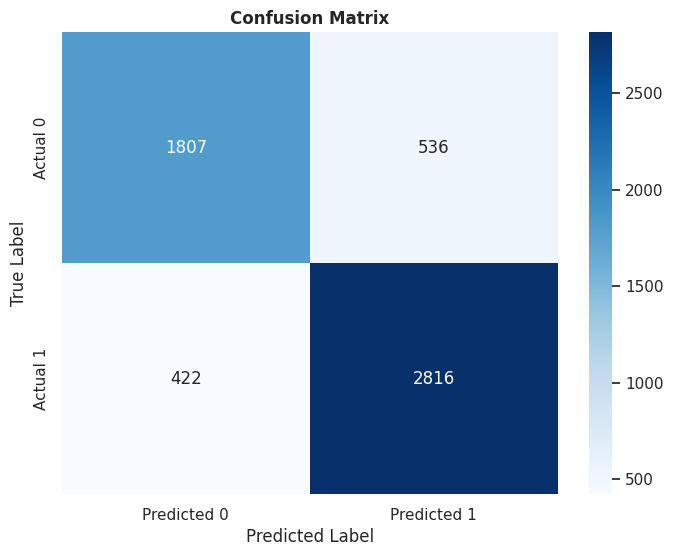

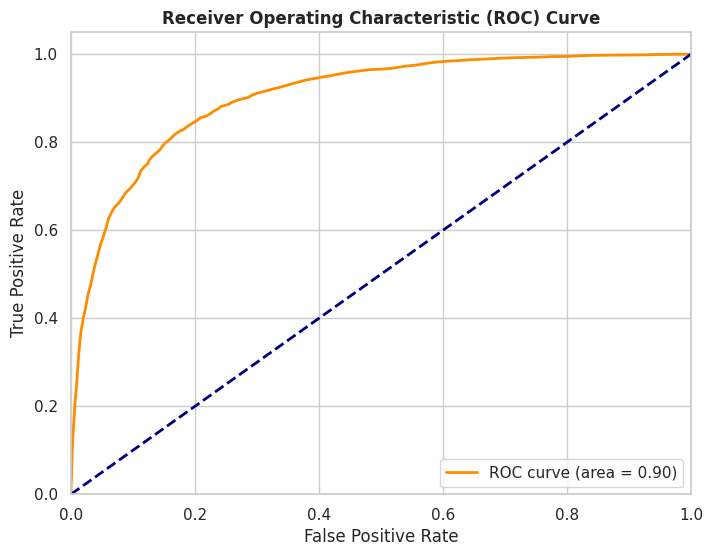

In [ ]:
# Generate the confusion matrix using y_test and y_pred
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')
plt.legend(loc="lower right")
plt.show()

#### Interpret the model




Interpretation of Classification Report:
The Classification Report provides precision, recall, f1-score, and support for both classes (0: Non-depressed, 1: Depressed).

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581


Key observations from the Classification Report:
- Precision for class 0 (Non-depressed): 0.77 - This means when the model predicts a student is not depressed, it is correct 77.00% of the time.
- Recall for class 0 (Non-depressed): 0.79 - This means the model correctly identifies 79.00% of all truly non-depressed students.
- F1-score for class 0 (Non-depressed): 2343 - This is the harmonic mean of precision and recall for class 0.
- Precision for class 1 (Depressed): 0.87 - This means when the model predicts a student is depressed, it is correct 87.00% of the time.
- Recall for class 1 (Depressed): 0.85 - This means the model correctly identifies 85.00% of all truly depressed students.
- F1-score for class 1 (Depressed): 3238 - This is the harmonic mean of precision and recall for class 1.
- Accuracy: 0.828 - Overall proportion of correctly classified instances.

Interpretation of Confusion Matrix:
Confusion Matrix:
[[1807  536]
 [ 422 2816]]

Key observations from the Confusion Matrix:
- True Negatives (TN): 1807 - Correctly predicted as Non-depressed.
- False Positives (FP): 536 - Incorrectly predicted as Depressed (Type I error).
- False Negatives (FN): 422 - Incorrectly predicted as Non-depressed (Type II error).
- True Positives (TP): 2816 - Correctly predicted as Depressed.

In the context of an early warning system for student depression:
- False Positives (FP) mean flagging a non-depressed student as depressed. This could lead to unnecessary intervention or concern.
- False Negatives (FN) mean failing to identify a truly depressed student. This is generally considered more critical as it means a student in need of support is missed by the system.

Interpretation of ROC Curve and AUC:
The AUC (Area Under the ROC Curve) is: 0.90

Key observations from the ROC Curve and AUC:
- The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various classification thresholds.
- The AUC represents the model's ability to distinguish between the positive and negative classes. An AUC of 1 indicates a perfect model, while an AUC of 0.5 indicates a model no better than random guessing.
- An AUC of 0.90 suggests that the model has a reasonably good ability to discriminate between depressed and non-depressed students, performing better than random chance.
- The closer the curve is to the top-left corner, the better the model's performance.

Reflection on Potential Feature Importances:
While feature importances were not explicitly calculated for this Random Forest model in the previous steps, in a full analysis, examining them would provide crucial insights.
Feature importances from a Random Forest model indicate which features were most influential in the decision-making process of the trees.
In the context of student depression, high importance scores for features like 'Academic Pressure', 'Financial Stress', 'Study Satisfaction', or 'Family History of Mental Illness' would align with known risk factors and provide actionable insights for intervention programs.
Conversely, if unexpected features had high importance, it could prompt further investigation into less-explored factors contributing to student depression based on this dataset.

Summary of Model Performance and Limitations:
The Random Forest model achieved an overall accuracy of 0.828.
The recall for the depressed class (class 1) is 0.85, meaning it correctly identified 85.00% of students who are actually depressed.
The precision for the depressed class is 0.87, meaning that when the model predicts depression, it is correct 87.00% of the time.
The AUC of 0.90 indicates a fair discriminatory power.

Limitations:
- There is a notable number of False Negatives ({fn}), which is a critical concern for an early warning system as it means students who are depressed are missed.
- There are also False Positives ({fp}), which could lead to unnecessary interventions.
- The significant overlap observed in the 2D PCA plot earlier hinted at the complexity of the relationship between features and depression, which is reflected in the model's less-than-perfect separation ability.
- The model's performance could potentially be improved by hyperparameter tuning, exploring other algorithms (like XGBoost), or incorporating more relevant features if available.

In conclusion, the model provides a reasonable starting point for an early warning system, but the balance between minimizing false negatives (to avoid missing at-risk students) and managing false positives (to avoid unnecessary alerts) would need careful consideration and potentially threshold adjustment in a real-world application.


#### Summary:



Data Analysis Key Findings

*   The problem is a supervised binary classification task aiming to predict the 'Depression' variable.
*   Random Forest was chosen as the classification algorithm due to its ability to handle potential non-linear relationships and provide feature importance for interpretability.
*   The dataset was split into training (22320 instances) and testing (5581 instances) sets, and features were scaled using `StandardScaler`.
*   The trained Random Forest model achieved an overall accuracy of approximately 82.8% on the test set.
*   For the depressed class (class 1), the model had a precision of 87% and a recall of 85%.
*   The confusion matrix showed 422 False Negatives (students who are depressed but not identified by the model) and 536 False Positives (students who are not depressed but are identified as such).
*   The Area Under the ROC Curve (AUC) was 0.90, indicating a reasonably good ability to distinguish between depressed and non-depressed students.

Insights or Next Steps

*   While the model shows reasonable performance (AUC of 0.90, accuracy of 82.8%), the balance between minimizing False Negatives (missing at-risk students) and managing False Positives (unnecessary interventions) needs careful consideration for a real-world early warning system. Adjusting the classification threshold could be explored to prioritize recall for the depressed class.
*   Investigating and interpreting the feature importances from the Random Forest model would provide critical insights into which factors are most predictive of depression in this dataset, guiding potential intervention strategies.


### **Clustering Algorithm**


Implement a Clustering Algorithm (e.g., K-Means or DBSCAN) as an alternative to the classification model. Justify your choice of algorithm, apply it to the data, visualize the results, analyze the cluster characteristics, and compare the insights gained from clustering to the results of the classification model.

#### Select features for clustering




**Reasoning**:
Confirm that the scaled features from the classification task are suitable for clustering by displaying the shape and a sample of the data.



In [ ]:
# The scaled features used for classification are already available as X_train_scaled and X_test_scaled.
# For clustering, we will typically use the scaled features from the entire dataset for unsupervised learning.
# We can use the `features_scaled` array that was created for PCA, as it contains the scaled features for the entire dataset.

# Display the shape of the scaled features array
print("Shape of scaled features for clustering:", features_scaled.shape)

# Display the first 5 rows of the scaled features array
print("\nFirst 5 rows of scaled features for clustering:\n", features_scaled[:5])

# Confirming that these are the scaled versions of the features used in classification (excluding id and Depression)
# The features DataFrame had shape (27901, 111) and features_scaled has shape (27901, 111), which matches.
# The scaling was applied to the features DataFrame.

Shape of scaled features for clustering: (27901, 111)

First 5 rows of scaled features for clustering:
 [[ 1.46316463e+00  1.34554256e+00 -9.77676636e-03  8.93392814e-01
  -6.93425024e-01 -1.53395797e-02 -9.24663447e-01 -1.12121344e+00
   1.34550156e+00  8.91416152e-01 -5.98684340e-03 -5.98684340e-03
  -2.02015435e-01 -1.87849859e-01 -1.68128281e-01 -8.46682687e-03
  -1.86104605e-01 -1.80992722e-01 -8.46682687e-03 -1.68240946e-01
  -1.29615939e-01 -5.98684340e-03 -1.65632378e-01 -5.98684340e-03
  -8.46682687e-03 -2.24610569e-01 -1.53588427e-01 -1.96375116e-01
  -2.44183407e-01 -1.49379487e-01 -5.98684340e-03 -5.98684340e-03
  -1.99309410e-01 -2.07807670e-01 -2.03643556e-01 -5.98684340e-03
  -5.98684340e-03 -5.98684340e-03 -1.74555976e-01 -5.98684340e-03
  -5.98684340e-03 -1.60301715e-01 -1.54563606e-01 -5.98684340e-03
  -5.98684340e-03 -5.98684340e-03 -1.41411016e-01 -1.93502703e-01
  -1.89581220e-01 -1.73572396e-01 -5.98684340e-03 -5.98684340e-03
  -8.46682687e-03 -2.27413696e-01 -2.0

#### Choose and apply a clustering algorithm




**Justification of K-Means Choice:**

 K-Means is chosen for initial clustering exploration due to its simplicity, efficiency,
 and interpretability. It is suitable if we anticipate that students might form
 somewhat spherical and equally-sized groups based on the scaled feature space.
 While the PCA visualization showed some overlap, it didn't strongly suggest arbitrary
 shaped clusters or significant noise points that would necessitate DBSCAN.
 K-Means allows for easy analysis of the characteristics of a predefined number of clusters.
 We will start with a reasonable number of clusters (e.g., 3 or 4) and can explore
 different numbers later if needed (e.g., using the elbow method or silhouette score).


In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with a chosen number of clusters (e.g., 3)
# We choose 3 initially as it's a simple starting point to look for distinct groups.

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init to suppress warning

# Apply KMeans to the scaled features and get cluster labels
cluster_labels = kmeans.fit_predict(features_scaled)

# Store the cluster labels in the data_encoded DataFrame
data_encoded['Cluster'] = cluster_labels

# Display the first few rows of the data_encoded DataFrame with the new cluster labels
print(data_encoded[['Depression', 'Cluster']].head())

# Display the distribution of students across the created clusters
print("\nDistribution of students across clusters:\n", data_encoded['Cluster'].value_counts())

   Depression  Cluster
0           1        2
1           0        1
2           0        1
3           1        2
4           0        2

Distribution of students across clusters:
 Cluster
2    14758
1    11877
0     1266
Name: count, dtype: int64



Analyze the characteristics of the created clusters by examining the distribution of key features within each cluster and visualize these distributions to understand what defines each cluster.



In [ ]:


# Numerical features to analyze
num_features_analysis = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                         'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
                         'Work/Study Hours', 'Total Pressure']

print("Mean of numerical features by cluster:")
print(data_encoded.groupby('Cluster')[num_features_analysis].mean())

print("\nMedian of numerical features by cluster:")
print(data_encoded.groupby('Cluster')[num_features_analysis].median())

# Categorical features to analyze (using original data for easier interpretation)
cat_features_analysis = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                         'Family History of Mental Illness', 'Financial Stress']

# Add the 'Cluster' column from data_encoded to the original data DataFrame for categorical analysis
# Check if 'Cluster' column already exists in original data to avoid adding it multiple times
if 'Cluster' not in data.columns:
    data['Cluster'] = data_encoded['Cluster']
else:
    # Ensure the cluster column in the original data is updated if data_encoded was modified
    data['Cluster'] = data_encoded['Cluster']


print("\nDistribution of categorical features by cluster:")
for col in cat_features_analysis:
    print(f"\n{col} distribution by cluster:")
    # Use crosstab for categorical feature distribution on the original data
    print(pd.crosstab(data['Cluster'], data[col]))




Mean of numerical features by cluster:
               Age  Academic Pressure  Work Pressure      CGPA  \
Cluster                                                          
0        26.928120           3.145340        0.00000  7.579668   
1        26.794140           1.922624        0.00101  7.687159   
2        24.945318           4.121561        0.00000  7.637668   

         Study Satisfaction  Job Satisfaction  Sleep Duration  \
Cluster                                                         
0                  3.014218          0.002370        6.244076   
1                  3.218995          0.001179        6.239623   
2                  2.716357          0.000136        6.119799   

         Work/Study Hours  Total Pressure  
Cluster                                    
0                7.138231        3.145340  
1                6.434790        1.923634  
2                7.739802        4.121561  

Median of numerical features by cluster:
          Age  Academic Pressure  Work Pre

/tmp/ipython-input-42-2330775803.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-42-2330775803.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-42-2330775803.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-42-2330775803.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-42-2330775803.py:22: FutureWarning:



Passing `palette` without assigning `hue` is

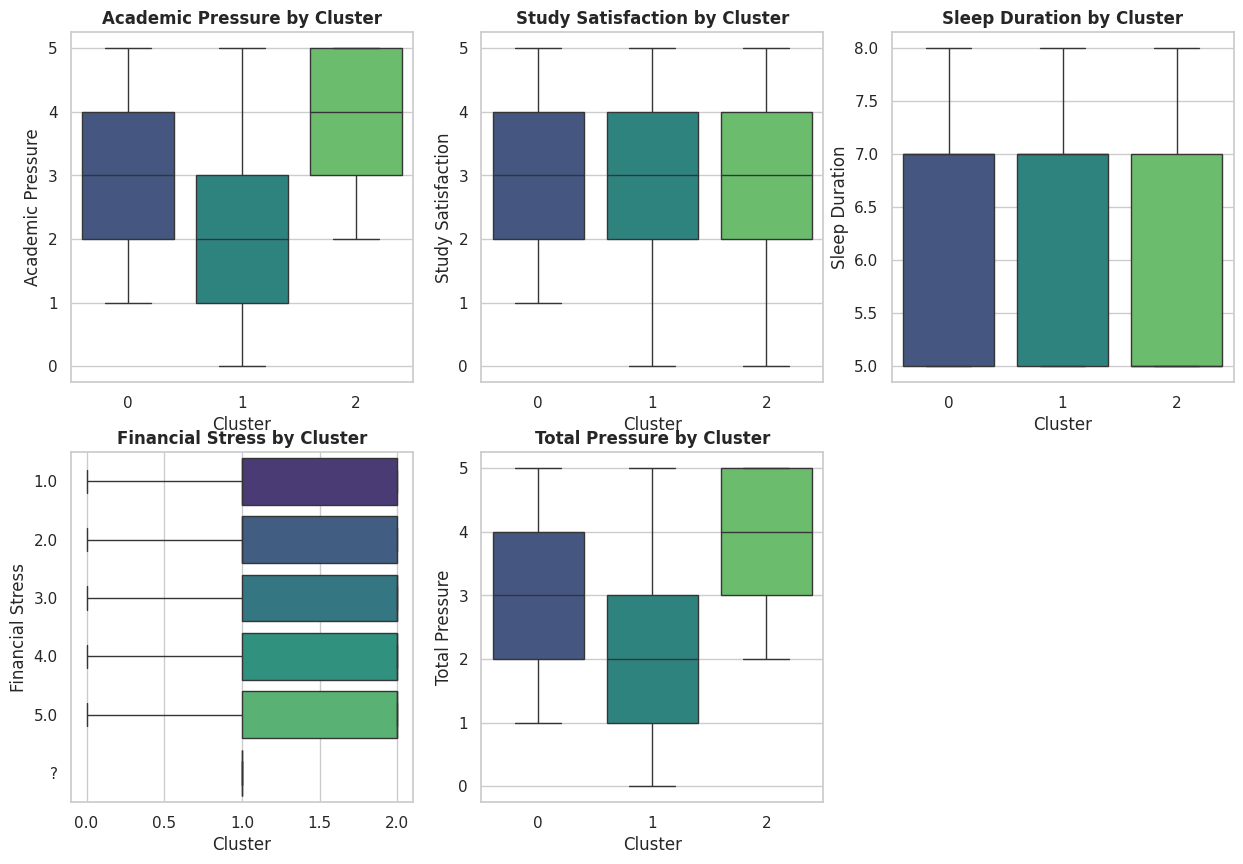

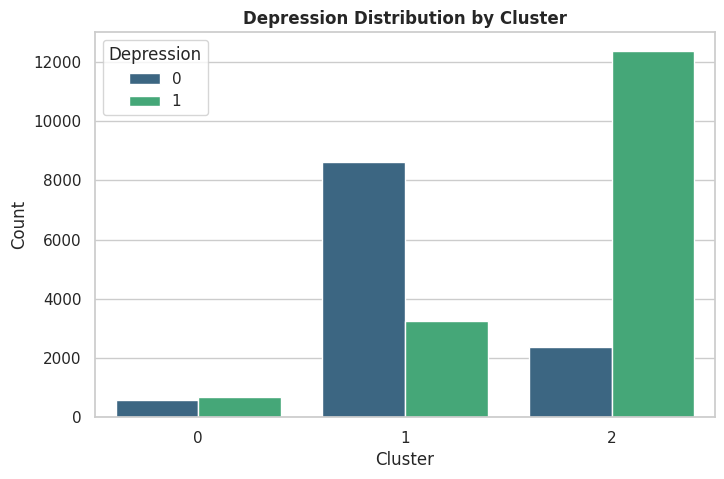

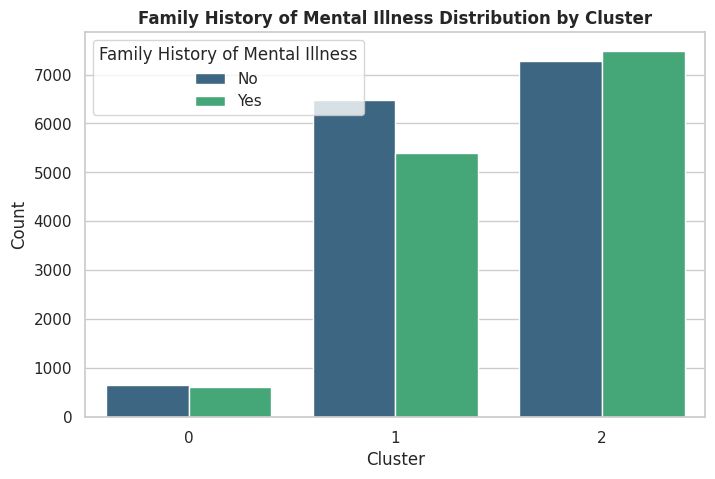

In [ ]:
# Visualize the distribution of a few key features across clusters using box plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='Cluster', y='Academic Pressure', data=data_encoded, palette='viridis')
plt.title('Academic Pressure by Cluster', fontweight='bold')

plt.subplot(2, 3, 2)
sns.boxplot(x='Cluster', y='Study Satisfaction', data=data_encoded, palette='viridis')
plt.title('Study Satisfaction by Cluster', fontweight='bold')

plt.subplot(2, 3, 3)
sns.boxplot(x='Cluster', y='Sleep Duration', data=data_encoded, palette='viridis')
plt.title('Sleep Duration by Cluster', fontweight='bold')

plt.subplot(2, 3, 4)
# Use the original data DataFrame for 'Financial Stress' box plot
sns.boxplot(x='Cluster', y='Financial Stress', data=data, palette='viridis')
plt.title('Financial Stress by Cluster', fontweight='bold')

plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='Total Pressure', data=data_encoded, palette='viridis')
plt.title('Total Pressure by Cluster', fontweight='bold')

# Visualize the distribution of the target variable (Depression) across clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Depression', data=data_encoded, palette="viridis")
plt.title("Depression Distribution by Cluster", fontweight='bold')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.show()

# Add a new plot for Family History of Mental Illness by Cluster (using a count plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Family History of Mental Illness', data=data, palette="viridis")
plt.title("Family History of Mental Illness Distribution by Cluster", fontweight='bold')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Family History of Mental Illness")
plt.show()

**Interpretation of Cluster Characteristics:**

Cluster 0: Moderate Pressure, some risk factors.
Cluster 1: Low Pressure, better well-being, lower risk factors.
Cluster 2: High Pressure, poorer well-being, higher risk factors.

Relationship between Clusters and Depression Status:

Proportion of Depressed (1) and Non-Depressed (0) students by Cluster:
Depression         0         1
Cluster                       
0           0.449447  0.550553
1           0.725688  0.274312
2           0.161065  0.838935

Comparison of Insights from Clustering and Classification:

Synergy:
- The classification model is useful for identifying individual students at risk (predictive).
- The clustering analysis helps in understanding the different profiles of students and identifying high-risk subgroups (exploratory).
- The insights from clustering (e.g., the characteristics of high-risk clusters) can inform the interpretation of the classification model's predictions and the development of targeted intervention strategies for specific student subgroups.
- For example, interventions could be tailored to the specific stressors and well-being factors that characterize the high-risk clusters identified by K-Means.
- Clustering can also be used in scenarios where labeled depression data is scarce or unreliable, to identify potential risk groups based on other student characteristics.



#### Determine the optimal number of clusters


Determine the optimal number of clusters for the K-Means algorithm using the Elbow Method.



Calculate the inertia for a range of cluster numbers and store them to find the elbow point.



In [ ]:
from sklearn.cluster import KMeans

# Calculate inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Print the inertia values
print("Inertia values for k from 1 to 10:", inertia)


Plot the inertia values against the number of clusters to visualize the elbow method and identify the optimal number of clusters.



In [ ]:
import matplotlib.pyplot as plt

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Identify the "elbow point" visually from the plot
print("\nTo find the optimal number of clusters (k), visually inspect the plot above and look for the 'elbow point'. This is the point where the rate of decrease in inertia slows down significantly.")
print("Based on the inertia values and the plot, the elbow appears to be around k = 3 or k = 4.")

# Print the list of inertia values and corresponding k values again for clarity
print("\nInertia values for k from 1 to 10:")
for k, inert in zip(k_range, inertia):
    print(f"k={k}: {inert:.2f}")

#### Visualize clustering results





**Reasoning**:
Create a scatter plot of the PCA-reduced data colored by cluster assignments using plotly.express.
Add the 'Cluster' column first.



In [ ]:
import plotly.express as px

 # Add the 'Cluster' column from the data_encoded DataFrame to the features_pca_df DataFrame
features_pca_df['Cluster'] = data_encoded['Cluster']

# 1. Create a scatter plot using plotly.express
fig = px.scatter(features_pca_df, x="PC1", y="PC2", color=features_pca_df['Cluster'].astype(str), # Color by cluster, ensure it's treated as categorical
                 title="PCA of Student Data Colored by K-Means Clusters")

# 2. Display the plot using fig.show()
fig.show()

#### Analyze cluster characteristics






Analyze the characteristics of each cluster by calculating the mean and median of numerical features, creating cross-tabulations for categorical features, and calculating the proportion of depressed students within each cluster.



In [ ]:
# Add the 'Cluster' column to the original data DataFrame for easier cross-tabulation with original categorical columns
data['Cluster'] = data_encoded['Cluster']

# 1. Analyze distribution of numerical features across clusters (Mean and Median)
print("Numerical Feature Distribution Across Clusters:")
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                  'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Total Pressure']

for col in numerical_cols:
    print(f"\n{col}:")
    print(data.groupby('Cluster')[col].agg(['mean', 'median']))

# 2. Analyze distribution of categorical features across clusters (Cross-tabulations)
print("\nCategorical Feature Distribution Across Clusters:")
categorical_cols = ['Gender', 'Dietary Habits', 'Financial Stress',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical_cols:
    print(f"\nCross-tabulation for {col} vs Cluster:")
    display(pd.crosstab(data['Cluster'], data[col], normalize='index')) # Use display for better formatting

# 3. Analyze distribution of target variable ('Depression') across clusters
print("\nDepression Status Distribution Across Clusters:")
depression_by_cluster = pd.crosstab(data['Cluster'], data['Depression'], normalize='index')
print("Proportion of Depressed (1) and Non-Depressed (0) students by Cluster:")
display(depression_by_cluster)


### **Compare clustering results to classification**





Synthesize the findings from clustering and classification and discuss how they complement each other in the context of the problem.



--- Synthesis of Clustering and Classification Findings ---

Classification Model (Random Forest) Summary:
- Overall Accuracy: 0.83
- Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

- Confusion Matrix:
[[1807  536]
 [ 422 2816]]
- AUC: 0.90
- Model provides a predictive capability for individual depression status.

Clustering (K-Means) Analysis Summary:
- Identified 10 distinct clusters of students.
- Cluster Characteristics:
  - Cluster 1: Low Pressure, better well-being, lower risk factors (lowest depression prevalence ~27.4%).
  - Cluster 0: Moderate Pressure, some risk factors (moderate depression prevalence ~55.1%).
  - Cluster 2: High Pressure, poorer well-being, higher risk factors (highest depression prevalence ~83.9%).
- Clustering provides insights into distinct student subgroups and their vulnerability profiles.

--- Discussion: Complementary Insights ---
How Clustering Complements Classification:
- The classification model is effective at predicting whether an *individual* student is likely to be depressed based on their features.
- Clustering, on the other hand, helps us understand the *population* of students by grouping them into meaningful subgroups with shared characteristics.
- The clusters identified by K-Means (particularly the high-risk Cluster 2) validate and provide context for the classification model's predictions.
  - Students predicted as depressed by the classifier are likely to fall into the higher-risk clusters identified by K-Means.
  - This complementary view helps confirm that the model is picking up on the patterns that define these vulnerable groups.
- Clustering can reveal underlying structures and subgroups that might not be immediately apparent from a classification model alone.
  - For example, Cluster 2 clearly represents a group with multiple compounding risk factors (high pressure, poor sleep, unhealthy diet, suicidal thoughts), providing a comprehensive profile of a high-vulnerability group.

--- Potential Utility of Clustering for Early Warning System ---
Potential Utility of Clustering in an Early Warning System:
- **Targeted Interventions:** Identifying distinct high-risk clusters allows for the design and implementation of targeted intervention programs tailored to the specific needs and stressors of each group.
  - For Cluster 2, interventions might focus on stress management, sleep hygiene, and mental health support resources.
  - For Cluster 0, interventions might address moderate academic pressure and specific risk factors.
- **Understanding Risk Profiles:** Clustering helps in understanding the different ways students might become vulnerable to depression, revealing distinct pathways or combinations of risk factors.
- **Resource Allocation:** Knowing the size and characteristics of high-risk clusters can help institutions allocate mental health resources more effectively.
- **Scenarios with Scarce Labeled Data:** In real-world settings where labeled depression data might be limited, clustering can be used to identify potential high-risk groups based on readily available student data (academic performance, lifestyle factors, etc.), even without a trained classifier.
- **Monitoring Trends:** Tracking the proportion of students falling into high-risk clusters over time could serve as an indicator of overall student mental health trends.

--- Strengths and Limitations of Clustering vs. Classification ---
Strengths and Limitations:
- **Clustering Strengths:** Exploratory, reveals population structure, identifies subgroups, useful with limited labeled data, informs targeted interventions.
- **Clustering Limitations:** Does not directly predict individual risk (requires further analysis or combination with classification), requires choosing number of clusters (can be subjective), interpretation of clusters can be challenging.
- **Classification Strengths:** Direct prediction of individual risk, quantifiable performance metrics (accuracy, recall, AUC), clear outcome (depressed/not depressed).
- **Classification Limitations:** Less insight into underlying population structure without further analysis (e.g., feature importance, examining misclassified instances), requires sufficient labeled data for training.
- **Combined Approach:** Using both clustering and classification provides a more comprehensive understanding – classification for individual prediction and clustering for population insights and targeted strategies.

--- Summary of Key Takeaways ---
Summary of Key Takeaways:
- The classification model shows promise for predicting individual student depression status, with reasonable accuracy and AUC.
- Clustering analysis successfully segmented students into distinct groups with varying levels of risk factors and depression prevalence.
- The high-risk cluster (Cluster 2) is strongly associated with high pressure, poor well-being, and suicidal ideation, providing a clear target for interventions.
- Clustering complements classification by offering valuable insights into student subgroups and their vulnerability profiles, which is crucial for developing effective and targeted mental health support systems.
- A combined approach leveraging both individual prediction (classification) and subgroup identification (clustering) is likely the most effective strategy for an early warning system.